In [5]:
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.dates as dates


In [6]:
def plot(filename):
    df = read_csv(filename, header=0, index_col=0, parse_dates=True, squeeze=True)
    df[df.columns[0]] = df[df.columns[0]].str.rstrip('%').astype('float')
    df[df.columns[1]] = df[df.columns[1]].str.rstrip('MiB').astype('int')
    fig, ax1 = pyplot.subplots()
    fig.set_size_inches(17, 7)

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('GPU', color=color)
    ax1.plot(df.index, df[df.columns[0]], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    # import matplotlib.dates as dates
    # ax1.xaxis.set_major_locator(dates.MinuteLocator(interval=1))
    # ax1.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    # ax1.xaxis.set_minor_locator(dates.SecondLocator(interval=10))
    # ax1.xaxis.set_minor_formatter(dates.DateFormatter('\n%H:%M')) 
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('VRAM', color=color)  # we already handled the x-label with ax1
    ax2.plot(df.index, df[df.columns[1]], ':', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    pyplot.show()


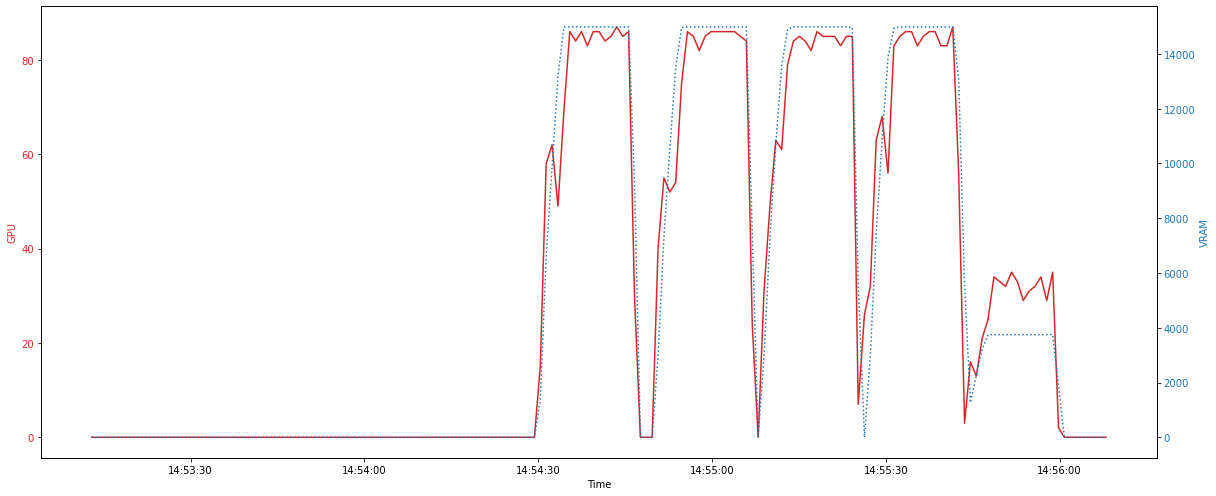

In [7]:
plot('./xgpg0/xgpg0_2.log.csv')
